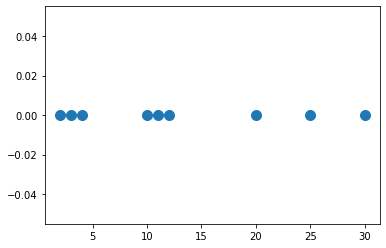

In [3]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples. silhouette_score
from pandas import DataFrame
#from sclpy.stats import entropy
#from math import log,e
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np
import pandas as pd

X = np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])
plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

##X에 x좌표 y 좌표 둘다 있음 

In [38]:
# k-means 1회차 k=2 , m1=3 , m2=4
model1 = KMeans(n_clusters = 2 , init = np.array([[3,0],[4,0]]),
                n_init=1, max_iter =1 , random_state =1 ).fit(X)

c0, c1 = model1.cluster_centers_ ##군집분석 돌린 결과 새로운 중심이 저장 
c0, c1#새로운 중심점 (0번 군집, 1번 군집)


##init : 클러스터 중심 
##n_clusters : k
##n_init : KMeans 돌리는 세트를 몇번 반복(한단계 한단계 하는 중)
##max_iter : 최대 몇회차 까지 돌 것 인가(충분히 크게 설정) - 100으로 해놔도 그 전에 좋은 군집 찾으면 그 정도만 함 
##random_state : 

(array([2.5, 0. ]), array([16.,  0.]))

In [7]:
model1.score(X),  model1.labels_
#군집도
#lable값 

-372.75

In [15]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                 np.linalg.norm(X-c0, axis=1)[:,np.newaxis],
                                 np.linalg.norm(X-c1, axis=1)[:,np.newaxis],
                                 model.labels_[:,np.newaxis]]),
                     columns=['x좌표','y좌표','거리0','거리1','군집번호'])
    return df
    
    
##np.hstack : np는 배열 -> 가로로(축을)붙여서 판다스 테이블로 만듬
##X와 c0의 거리 
##X와 c1의 거리 

In [20]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,거리0,거리1,군집번호
0,2.0,0.0,0.5,14.0,0.0
1,3.0,0.0,0.5,13.0,0.0
2,4.0,0.0,1.5,12.0,0.0
3,10.0,0.0,7.5,6.0,1.0
4,11.0,0.0,8.5,5.0,1.0
5,12.0,0.0,9.5,4.0,1.0
6,20.0,0.0,17.5,4.0,1.0
7,25.0,0.0,22.5,9.0,1.0
8,30.0,0.0,27.5,14.0,1.0


In [24]:
#그래프 출력
def plot_cluster(model , c0, c1):
    plt.scatter(X[model.labels_==0,0],
                X[model.labels_==0,1],s=100 , c='r', marker='v')
    plt.scatter(X[model.labels_==1,0],
                X[model.labels_==1,1],s=100 , c='b', marker='^')
    plt.scatter(c0[0],c0[1],s=200,c='r')
    plt.scatter(c1[0],c1[1],s=200,c='b')
    plt.show()
    ##1번군집에 있는 것만 출력 -red
    ##2번 - blue

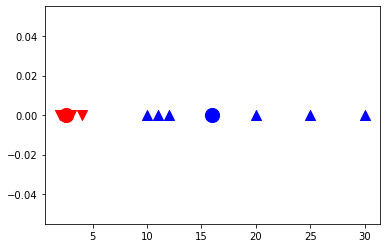

In [25]:
plot_cluster(model1,c0,c1)

In [54]:
# k-means 2회차 k=2 , m1=2.5 , m2=16
model2 = KMeans(n_clusters = 2 , init = np.array([[2.5,0],[16,0]]),
                n_init=1, max_iter =1 , random_state =1 ).fit(X)

c0, c1 = model2.cluster_centers_ 
c0, c1

#kmeans_df(model2,c0,c1)
#model2.score(X),  model2.labels_  #1회차 보다 더 좋은 군집 
#plot_cluster(model2,c0,c1)

(array([3., 0.]), array([18.,  0.]))

In [60]:
# k-means 3회차 k=2 , m1=3 , m2=18
model3 = KMeans(n_clusters = 2 , init = np.array([[3,0],[18,0]]),
                n_init=1, max_iter =1 , random_state =1 ).fit(X)

c0, c1 = model3.cluster_centers_ 
c0, c1
#kmeans_df(model3,c0,c1)

(array([4.75, 0.  ]), array([19.6,  0. ]))

In [36]:
# k-means 4회차 k=2 , m1=4.75 , m2=19.6
model4 = KMeans(n_clusters = 2 , init = np.array([[4,0],[19.6,0]]),
                n_init=1, max_iter =1 , random_state =1 ).fit(X)

c0, c1 = model4.cluster_centers_ 
#c0, c1
kmeans_df(model4,c0,c1)

,x좌표,y좌표,거리0,거리1,군집번호
0,2.0,0.0,4.0,19.75,0.0
1,3.0,0.0,3.0,18.75,0.0
2,4.0,0.0,2.0,17.75,0.0
3,10.0,0.0,4.0,11.75,0.0
4,11.0,0.0,5.0,10.75,0.0
5,12.0,0.0,6.0,9.75,0.0
6,20.0,0.0,14.0,1.75,1.0
7,25.0,0.0,19.0,3.25,1.0
8,30.0,0.0,24.0,8.25,1.0


In [37]:
# k-means 5회차 k=2 , m1=6 , m2=21.75
model5 = KMeans(n_clusters = 2 , init = np.array([[6,0],[21.75,0]]),
                n_init=1, max_iter =1 , random_state =1 ).fit(X)

c0, c1 = model5.cluster_centers_  
#c0, c1
kmeans_df(model5,c0,c1)  ##군집번호가 안바뀜 (stop!!)

##5회차에서 최종군집 결정! 

,x좌표,y좌표,거리0,거리1,군집번호
0,2.0,0.0,5.0,23.0,0.0
1,3.0,0.0,4.0,22.0,0.0
2,4.0,0.0,3.0,21.0,0.0
3,10.0,0.0,3.0,15.0,0.0
4,11.0,0.0,4.0,14.0,0.0
5,12.0,0.0,5.0,13.0,0.0
6,20.0,0.0,13.0,5.0,1.0
7,25.0,0.0,18.0,0.0,1.0
8,30.0,0.0,23.0,5.0,1.0


In [ ]:
##원래는 하나의 코드로 max_iter을 바꾸면 됨 ( 지금까지는 과정을 보이느라 하나하나 한 것 )

In [ ]:
#실제로 돌릴 때 
model1 = KMeans(n_clusters =2 , init = 'random', n_init=40,
               max_iter=9999999,random_state=1).fit(X)

#init = 'k-means++' -> 이렇게 해도 됨 
#n_init = 1 (중심점 몇번 반복해서 돌릴까)


<h2>군집평가

In [ ]:
#1회차 돌리고 오기
#군집도(score)

<h4>분리도

In [42]:
#평균

np.mean(X[:,0]),np.mean(X[model1.labels_ == 0,0]),np.mean(X[model1.labels_ == 1,0])

##전체평균
##0번 군집의 평균
##1번 군집의 평균

(13.0, 3.0, 18.0)

In [44]:
#데이터 개수

np.count_nonzero(X[model1.labels_ == 0,0]),np.count_nonzero(X[model1.labels_ == 1,0])

##배열에서 0이아닌 것의 개수:nonzero
##1번군집에서 0이아닌 것의 개수 , 2번 군집에서 0이아닌 것의 개수

(3, 6)

In [46]:
#분리도
def separation(model):
    total_mean = np.mean(X[:,0])
    m1 = np.mean(X[model1.labels_ == 0,0])
    m2 = np.mean(X[model1.labels_ == 1,0])
    count1 = np.count_nonzero(X[model1.labels_ == 0,0])
    count2 = np.count_nonzero(X[model1.labels_ == 1,0])
    separation = count1*(total_mean - m1)**2 + count2*(total_mean - m2)**2
    print(separation)

In [47]:
separation(model1)

450.0


In [48]:
#유사도 매트릭스
list1 = []
np.count_nonzero(X)
#데이터의 개수 
#배열 만들어놈

9

In [50]:
#유사도 매트릭스 출력 함수
def s_matrix(model):
    for i in range(0,np.count_nonzero(X)):
        list1.append([])
        for j in range(0,np.count_nonzero(X)):
            if model1.labels_[i]==model1.labels_[j]:
                list1[i].append(1)
            else:
                list1[i].append(0)

        
## i 가 0-9 , j가 0-9 일 때
##i번째 군집과 j번째 군집이 같은 군집이면 1 , 다른 군집이면 0 을 출력

##list1.append([]) : 한줄 채워지면 줄바꿔줌 (ppt p.25)

In [51]:
list1=[]
s_matrix(model1)
list1

##list1배열 초기화 

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [52]:
#엔트로피 
def entropy(labels):
    n_labels = len(labels)
    
    if n_labels <= 1 :
        return 0 
    
    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = len(probs)
    
    if n_classes <= 1:
        return 0
    return - np.sum(probs + np.log(probs)/np.log(n_classes))
    

##1번군집 라벨 , 2번,,, 비교하면 
##전체 개수대비 라벨이 1인 것 개수 :p1
##전체개수 대비 라벨이 2인 것 개수 :p2

#n_labels = 전체라벨개수 
#라벨값이 1보다 작으면 0

#bincount:바이너리 카운트 - 값이 같은 애들의 개수 (군집0(label=1)인 애들 3개, 군집1(label=2)인 애들 6개)
#군집의 개수=2(n_classes) --> log2 


##logPi / log(2)  #자연로그여서 밑을 2로 하려면 

In [53]:
entropy(model1.labels_)

1.1699250014423126

In [ ]:
#<실습> 
#2회차부터 해보기
#model2
##1회차일 때와 3회차일때 응집도, 분리도 어떻게 달라지는지 실습

In [55]:
#2회차
#분리도
separation(model2)

490.05000000000007


In [58]:
#유사도
def s_matrix(model):
    for i in range(0,np.count_nonzero(X)):
        list2.append([])
        for j in range(0,np.count_nonzero(X)):
            if model2.labels_[i]==model2.labels_[j]:
                list2[i].append(1)
            else:
                list2[i].append(0)
list2=[]
s_matrix(model2)
list2

[[1, 1, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1]]

In [59]:
#엔트로피
entropy(model2.labels_)

1.0179219079972623

In [61]:
#3회차
#분리도
separation(model3)

648.0


In [62]:
#유사도
def s_matrix(model):
    for i in range(0,np.count_nonzero(X)):
        list3.append([])
        for j in range(0,np.count_nonzero(X)):
            if model3.labels_[i]==model3.labels_[j]:
                list3[i].append(1)
            else:
                list3[i].append(0)
list3=[]
s_matrix(model3)
list3

[[1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1]]

In [63]:
#엔트로피
entropy(model3.labels_)

1.1699250014423126